### Download data

In [1]:
import os
from dblue_stores import StoreManager

store = StoreManager(dataset_id="dblue-demo-datasets")

if not os.path.isdir("/dblue/home/data"):    
    store.download_dir("digit-recognizer", "/dblue/home/data")
!ls /dblue/home/data

sample_submission.csv  test.csv  train.csv


### Install libraries

In [1]:
# install libraries
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install sklearn

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 1.5MB 1.3MB/s eta 0:00:01
  Running setup.py install for bcolz ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py install for sklearn ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [12]:
import pandas as pd
import numpy as np
# import bcolz

In [13]:
train = pd.read_csv('/dblue/home/data/train.csv')
test = pd.read_csv('/dblue/home/data/test.csv')

In [14]:
train.shape

(42000, 785)

In [15]:
test.shape

(28000, 784)

### Split features and label

In [16]:
def get_dataset(train, test):
    train_features = train.iloc[:,1:]
    train_labels = train.iloc[:,0]
    train_features = np.array(train_features).astype(np.uint8)
    test_features = np.array(test).astype(np.uint8)
    return train_features, train_labels, test_features


train_features, train_labels, test_features = get_dataset(train, test)

### View Image

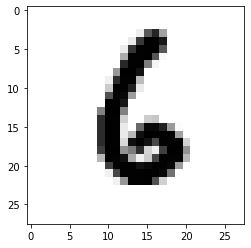

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train_features = np.array(train_features).reshape((-1, 1, 28, 28)).astype(np.uint8)
test_features = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

plt.imshow(train_features[1730][0], cmap=cm.binary) # draw the picture

### 1. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [19]:
train_features, train_labels, test_features = get_dataset(train, test)

In [20]:
m = RandomForestClassifier(n_estimators=100)
m.fit(train_features, train_labels)
pred = m.predict(test_features)
pred

array([2, 0, 9, ..., 3, 9, 2])

In [21]:
scores = cross_val_score(m, train_features, train_labels, cv=5)
scores

array([0.96395003, 0.96370344, 0.96118586, 0.96332023, 0.96581706])